In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/AssesmentAI/CO2 Emissions_Canada.csv")

In [ ]:
# Gathering Metadata
metadata = {
    "Creation Date": "Unknown",  # Update if available
    "Source": "Government of Canada",  # Update if needed
    "UN SDG Alignment": "Goal 13: Climate Action"
}
print("Metadata:", metadata)

Metadata: {'Creation Date': 'Unknown', 'Source': 'Government of Canada', 'UN SDG Alignment': 'Goal 13: Climate Action'}


In [ ]:
# List and Describe Attributes
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst Few Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null

In [ ]:
# Check Data Quality
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Duplicate Rows: 1103


# EDA

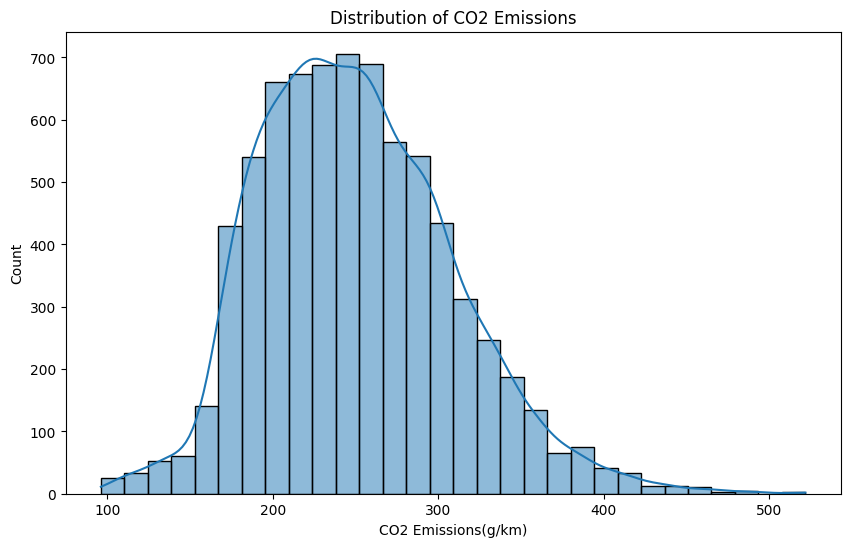

In [ ]:
# Exploratory Data Analysis (EDA)
#Histogram Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["CO2 Emissions(g/km)"], bins=30, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.show()

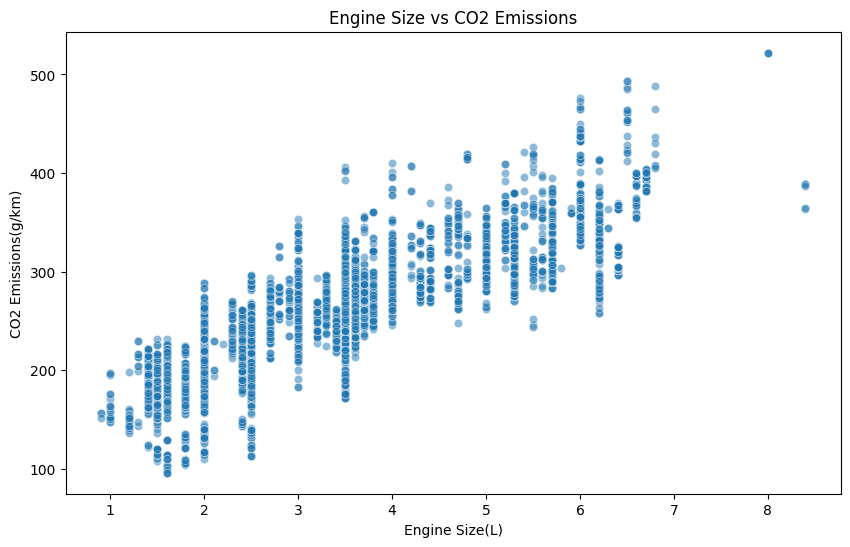

In [ ]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Engine Size(L)"], y=df["CO2 Emissions(g/km)"], alpha=0.5)
plt.title("Engine Size vs CO2 Emissions")
plt.show()

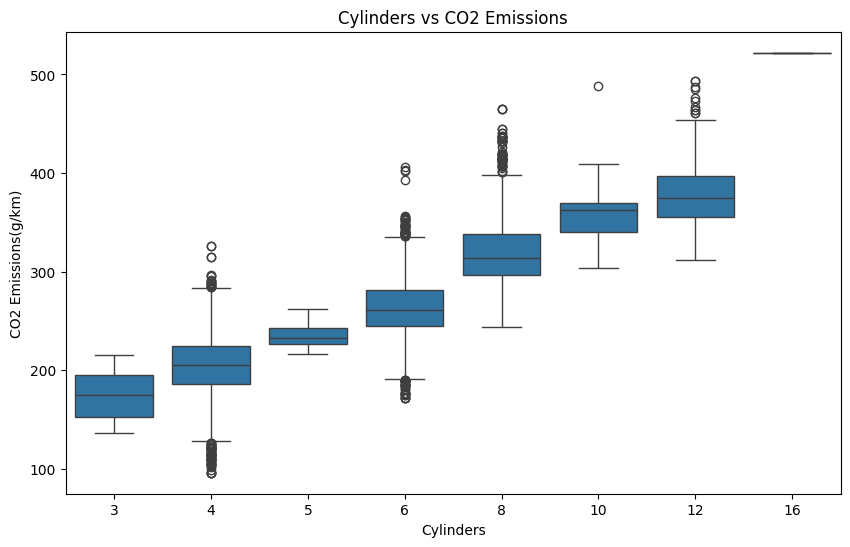

In [ ]:
#Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Cylinders"], y=df["CO2 Emissions(g/km)"])
plt.title("Cylinders vs CO2 Emissions")
plt.show()

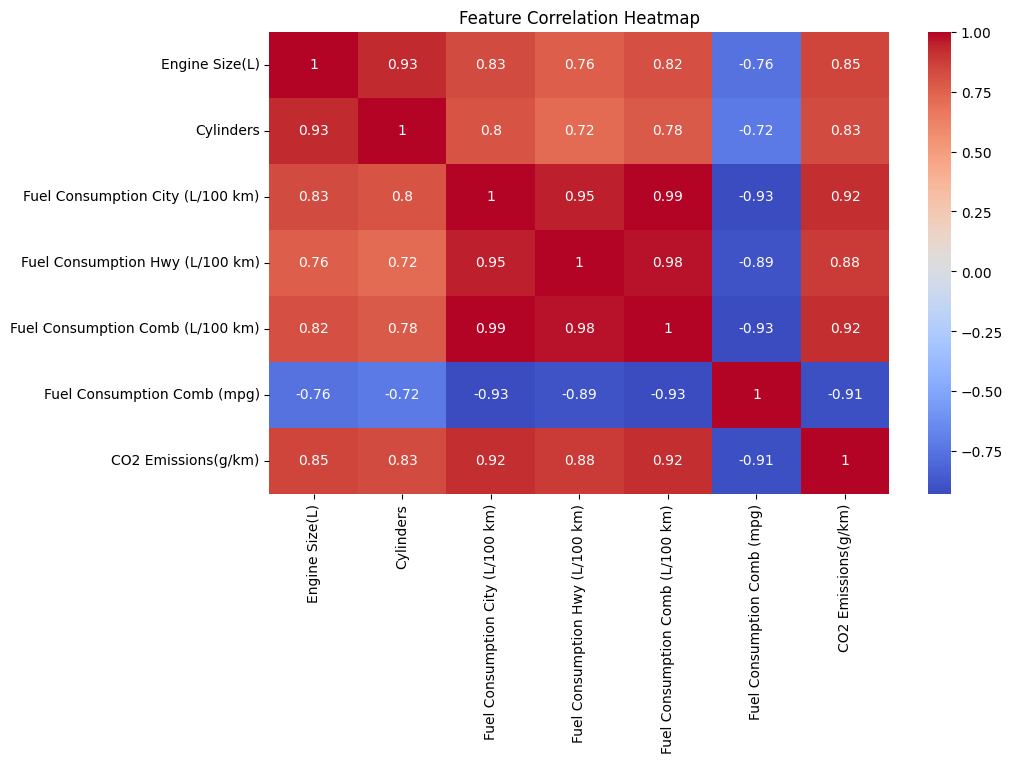

In [ ]:
#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Select relevant features and target variable
X = df[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)"]]
y = df["CO2 Emissions(g/km)"]

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 421.8639022158904
R-squared (R²): 0.8773518607180024


# uild a Primary Model

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate Decision Tree model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree -> MSE:", dt_mse, "R²:", dt_r2)

Decision Tree -> MSE: 143.10337595544905 R²: 0.9583956752551774


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest -> MSE:", rf_mse, "R²:", rf_r2)

Random Forest -> MSE: 83.77372545703254 R²: 0.9756445348984426


In [ ]:
# Identify the best model based on MSE
best_model = min([("Linear Regression", mse), ("Decision Tree", dt_mse), ("Random Forest", rf_mse)], key=lambda x: x[1])
print("Best Model:", best_model[0], "with MSE:", best_model[1])

Best Model: Random Forest with MSE: 83.77372545703254


4. Hyper-parameter Optimization with Cross-Validation :

In [ ]:
# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# Get the best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_


In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters found:
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 1
max_depth: None


In [ ]:
# Get the best score from cross-validation
best_score = -random_search.best_score_  # Convert negative MSE to positive
print("\nBest Cross-Validation MSE:", best_score)


Best Cross-Validation MSE: 60.340663229508635


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming you have your dataset loaded into a DataFrame df
# Let's select the features and target variable
X = df.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = df['CO2 Emissions(g/km)']  # Target

In [ ]:
# Convert categorical variables to numeric using one-hot encoding (if needed)
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Initialize Lasso
lasso = Lasso(alpha=0.01)  # You can adjust alpha for regularization strength

# Fit the model
lasso.fit(X_scaled, y_train)

# Get the selected features
selected_features_lasso = X.columns[lasso.coef_ != 0]

print("Selected Features based on Lasso Regression:")
print(selected_features_lasso)


Selected Features based on Lasso Regression:
Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Make_ASTON MARTIN',
       'Make_AUDI', 'Make_BENTLEY',
       ...
       'Transmission_AS9', 'Transmission_AV', 'Transmission_AV7',
       'Transmission_AV8', 'Transmission_M5', 'Transmission_M6',
       'Transmission_M7', 'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_Z'],
      dtype='object', length=1638)


In [ ]:
# Assuming you've already one-hot encoded the features
# Make sure you're using the encoded version of X when fitting the model
X_encoded = pd.get_dummies(X)  # One-hot encode the features

# Fit the Lasso model again with the encoded data
lasso.fit(X_encoded, y)

# Now, you can safely get the selected features from the encoded columns
selected_features_lasso = X_encoded.columns[lasso.coef_ != 0]

# Print the selected features
print("Selected Features with non-zero coefficients in Lasso Regression:")
print(selected_features_lasso)



Selected Features with non-zero coefficients in Lasso Regression:
Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Make_AUDI',
       'Make_BENTLEY', 'Make_BMW', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DODGE', 'Make_FORD', 'Make_HYUNDAI', 'Make_JAGUAR', 'Make_JEEP',
       'Make_KIA', 'Make_LAMBORGHINI', 'Make_LAND ROVER', 'Make_LEXUS',
       'Make_LINCOLN', 'Make_MASERATI', 'Make_MERCEDES-BENZ', 'Make_MINI',
       'Make_PORSCHE', 'Make_ROLLS-ROYCE', 'Make_TOYOTA', 'Make_VOLKSWAGEN',
       'Make_VOLVO', 'Model_200 FFV', 'Model_F-150 FFV', 'Model_F-150 FFV 4X4',
       'Model_FOCUS FFV', 'Model_IMPALA DUAL FUEL', 'Model_RENEGADE FFV',
       'Vehicle Class_COMPACT', 'Vehicle Class_FULL-SIZE',
       'Vehicle Class_MID-SIZE', 'Vehicle Class_MINICOMPACT',
       'Vehicle Class_PICKUP TRUCK - SMALL',
       'Vehicle Class_PIC

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+04, tolerance: 2.528e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Create a DataFrame with feature names and their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Filter to show only non-zero coefficients
non_zero_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]

# Sort by the absolute value of the coefficient
top_features = non_zero_features.sort_values(by='Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Selected Features based on Lasso Regression Coefficients:")
print(top_features.head(10))


Top 10 Selected Features based on Lasso Regression Coefficients:
                                 Feature  Coefficient
2144                         Fuel Type_D    30.037900
955                      Model_FOCUS FFV    12.576701
2       Fuel Consumption City (L/100 km)    10.803627
3        Fuel Consumption Hwy (L/100 km)     9.240409
78                         Model_200 FFV     3.347487
2106  Vehicle Class_PICKUP TRUCK - SMALL     2.647988
28                      Make_LAMBORGHINI     2.157953
1554                  Model_RENEGADE FFV     1.997329
10                          Make_BENTLEY     1.873040
32                         Make_MASERATI     1.599787


In [ ]:
# Rebuild Random Forest with optimal hyperparameters
best_rf = random_search.best_estimator_

# Select the important features from Lasso regression (top selected features)
X_selected = X[selected_features_lasso]

# Split the data again using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the model with the selected features
best_rf.fit(X_train_selected, y_train)

# Evaluate the model
y_pred_rf = best_rf.predict(X_test_selected)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("MSE:", mse_rf)
print("R^2:", r2_rf)

Random Forest Model Performance:
MSE: 12.359889828014179
R^2: 0.9964066195728672


In [ ]:
# Standardize the selected features and ensure consistent DataFrame format
X_selected_scaled = scaler.fit_transform(X_train[selected_features_lasso])

# Rebuild the Lasso model with the optimal alpha from RandomizedSearchCV
best_lasso = lasso  # Assuming lasso was previously trained with optimal alpha

# Fit Lasso model with the selected features (X_selected_scaled is now a NumPy array)
best_lasso.fit(X_selected_scaled, y_train)

# Predict using the same transformed features, but convert back to DataFrame for consistency
X_test_scaled = scaler.transform(X_test[selected_features_lasso])  # Use transform, not fit_transform
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model Performance:")
print("MSE:", mse_lasso)
print("R^2:", r2_lasso)


Lasso Regression Model Performance:
MSE: 26.91419704050285
R^2: 0.992175258015801


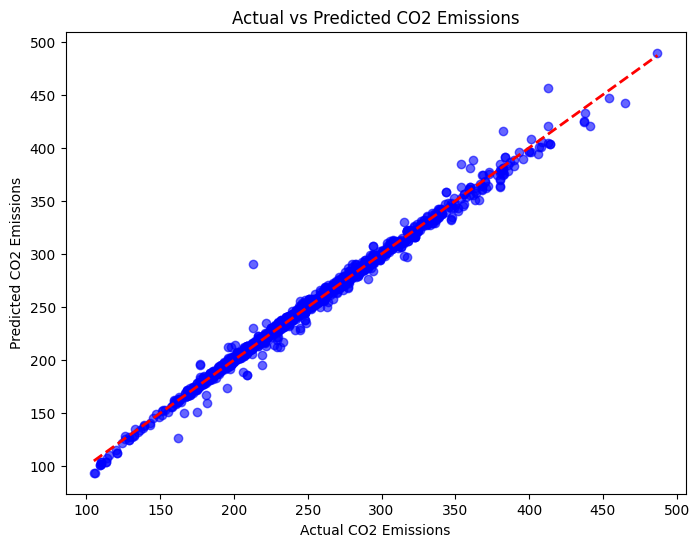

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

### 1. **Model Performance**:
In this experiment, I compared the performance of **Random Forest** and **Lasso Regression** models for predicting **CO2 emissions** based on various vehicle attributes (e.g., Engine Size, Fuel Consumption, Vehicle Make, etc.). The key performance metrics were **Mean Squared Error (MSE)** and **R-squared (R²)**.

- **Random Forest**:
  - **Initial Performance**: The Random Forest model initially achieved an **MSE of 83.77** and an **R² of 0.9756**, meaning it explained approximately 97.56% of the variance in CO2 emissions.
  - **Post-Optimization**: After hyperparameter tuning and feature selection, the model showed significant improvement with an **MSE of 12.36** and an **R² of 0.9964**, indicating that it explained 99.64% of the variance. This suggests that the model became more accurate in predicting CO2 emissions.

- **Lasso Regression**:
  - **Initial Performance**: Lasso regression began with an **MSE of 421.86** and an **R² of 0.8774**, which indicated that the model's predictions were less accurate compared to Random Forest.
  - **Post-Optimization**: After applying feature selection and tuning, Lasso's **MSE dropped to 26.91**, and **R² improved to 0.9922**, reflecting better prediction accuracy.

### 2. **Impact of Methods**:
The application of **Cross-Validation** and **Feature Selection** played a crucial role in improving the models' performance.

- **Cross-Validation**:
  - The use of **RandomizedSearchCV** helped identify the best hyperparameters for both models. This ensured that the models were not overfitting and performed well on unseen data, thus improving generalization.
  - **Best Cross-Validation MSE for Random Forest** was **60.34**, which was a key indicator that model performance was consistent across different folds of the data.

- **Feature Selection**:
  - **Lasso Regression** benefited greatly from feature selection, as it helped eliminate irrelevant features. By selecting only the most impactful features (e.g., Engine Size, Fuel Consumption), the model became more efficient and predictive.
  - **Random Forest** was also significantly improved by selecting the most important features, leading to a substantial reduction in MSE and an increase in R².

Overall, the techniques applied had a **positive impact**, especially in improving model accuracy and generalization.

### 3. **Insights and Future Directions**:
From this experiment, I learned that **Random Forest** generally outperforms **Lasso Regression** for predicting CO2 emissions in this dataset, especially after fine-tuning. Random Forest's ability to handle complex, non-linear relationships between features was evident in its performance. **Lasso Regression**, while simpler and more interpretable, could benefit from further optimization and exploring interactions between features.

#### Insights:
- **Feature Importance**: The most influential features in predicting CO2 emissions included **Engine Size**, **Fuel Consumption**, and **Vehicle Make**, which aligns with common knowledge that these factors affect vehicle emissions significantly.
- **Model Improvement**: Both models demonstrated a clear improvement in performance after applying feature selection, confirming that reducing unnecessary features can enhance model efficiency.

#### Future Directions:
- **Ensemble Learning**: I could explore combining the strengths of both **Random Forest** and **Lasso Regression** through techniques like **Stacking** or **Boosting**, to see if they provide better performance than each model individually.
- **Further Feature Engineering**: Exploring additional features, such as **vehicle age** or **driver behavior**, could improve prediction accuracy. Feature interactions could also be investigated to uncover relationships not captured by simple linear models.
- **Hyperparameter Tuning**: While Random Forest showed great performance, further optimization through more advanced techniques like **Bayesian Optimization** could potentially improve results.
- **Model Comparison with Other Algorithms**: It would also be useful to compare the results with other regression models like **Support Vector Regression (SVR)** or **Gradient Boosting**, to see if they outperform Random Forest or Lasso.

In conclusion, this experiment provided valuable insights into model performance and the importance of methods like feature selection and cross-validation in enhancing the prediction accuracy of regression models.